In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
data=pd.read_csv("myexcel.csv")

In [25]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [ ]:
#first dealing with missing values

In [27]:
print("Missing values before cleaning:")
print(data.isnull().sum())

Missing values before cleaning:
Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


In [33]:
 #Filling numeric columns with their mean and non-numeric with a placeholder
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        data[column] = data[column].fillna('Unknown')  # Replace missing with 'Unknown'
    elif pd.api.types.is_numeric_dtype(data[column]):  # Numeric column
        data[column] = data[column].fillna(data[column].mean())  # Replace missing with mean


In [35]:
print("Missing values after cleaning:")
print(data.isnull().sum())

Missing values after cleaning:
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [ ]:
#Correcting the data in the "height" column by replacing it with random numbers between 150 and 180

In [37]:
data['Height'] = np.random.randint(150, 181, data.shape[0])


In [39]:
data['Height']

0      166
1      169
2      172
3      172
4      151
      ... 
453    167
454    176
455    160
456    176
457    151
Name: Height, Length: 458, dtype: int32

In [ ]:
#Determining the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [41]:
# Calculate the count of employees in each team
team_distribution = data['Team'].value_counts()

# Calculate the percentage split for each team
total_employees = team_distribution.sum()
team_percentage = (team_distribution / total_employees) * 100

# Combine the counts and percentages into a single DataFrame
team_analysis = pd.DataFrame({
    'Team': team_distribution.index,
    'Count': team_distribution.values,
    'Percentage': team_percentage.values
})

In [43]:
# Display the results
print(team_analysis)

                      Team  Count  Percentage
0     New Orleans Pelicans     19    4.148472
1        Memphis Grizzlies     18    3.930131
2                Utah Jazz     16    3.493450
3          New York Knicks     16    3.493450
4          Milwaukee Bucks     16    3.493450
5            Brooklyn Nets     15    3.275109
6   Portland Trail Blazers     15    3.275109
7    Oklahoma City Thunder     15    3.275109
8           Denver Nuggets     15    3.275109
9       Washington Wizards     15    3.275109
10              Miami Heat     15    3.275109
11       Charlotte Hornets     15    3.275109
12           Atlanta Hawks     15    3.275109
13       San Antonio Spurs     15    3.275109
14         Houston Rockets     15    3.275109
15          Boston Celtics     15    3.275109
16          Indiana Pacers     15    3.275109
17         Detroit Pistons     15    3.275109
18     Cleveland Cavaliers     15    3.275109
19           Chicago Bulls     15    3.275109
20        Sacramento Kings     15 

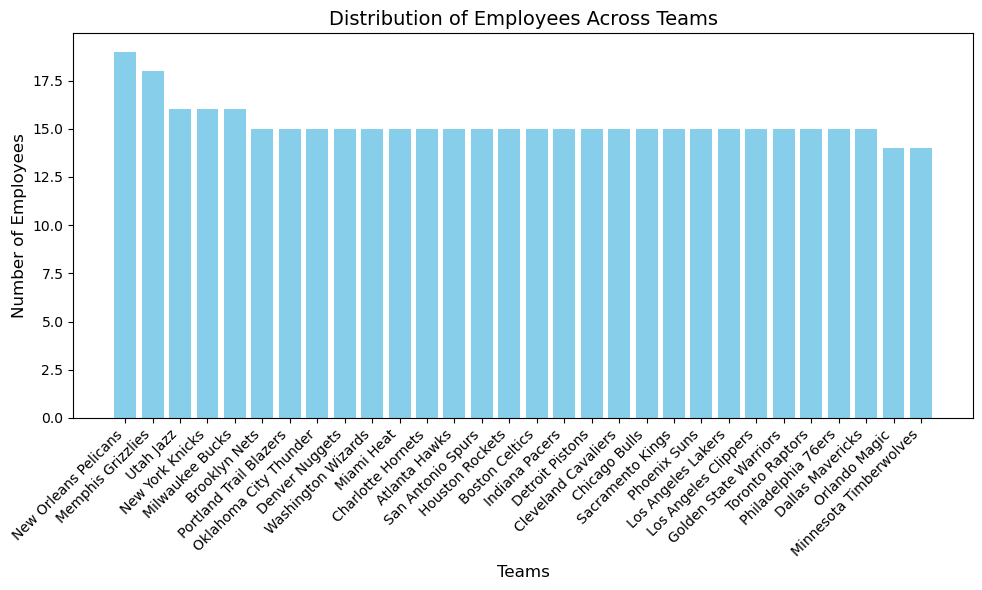

In [45]:
# Plot the distribution of employees (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(team_analysis['Team'], team_analysis['Count'], color='skyblue')
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.title('Distribution of Employees Across Teams', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the graph
plt.show()

In [ ]:
#Segregating employees based on their positions within the company

In [55]:
position_distribution=data['Position'].value_counts()

In [57]:
print(position_distribution)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


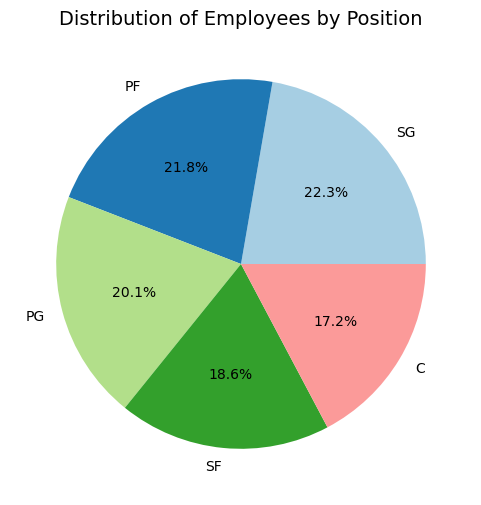

In [61]:
plt.figure(figsize=(6, 6))
plt.pie(position_distribution.values, labels=position_distribution.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Employees by Position', fontsize=14)

# Display the pie chart
plt.show()

In [ ]:
# Identifying the predominant age group among employees

In [7]:
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_distribution = data['Age_group'].value_counts()

In [10]:
print(age_group_distribution)

Age_group
18-30    336
31-40    119
41-50      3
51-60      0
60+        0
Name: count, dtype: int64


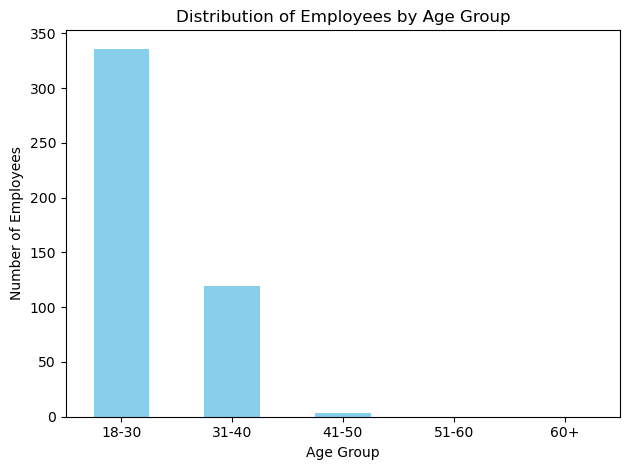

In [12]:
age_group_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Discovering which team and position have the highest salary expenditure.

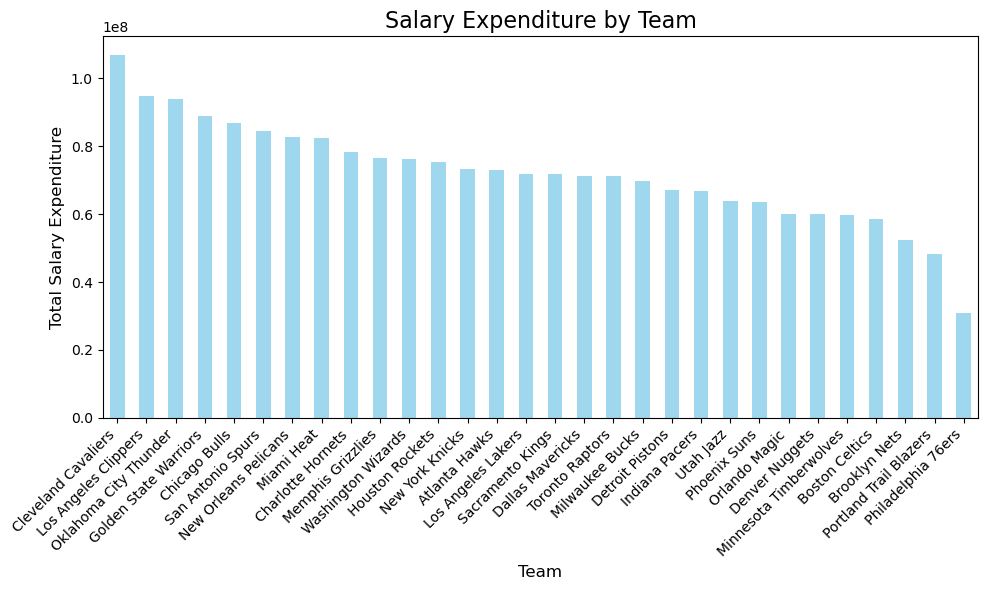

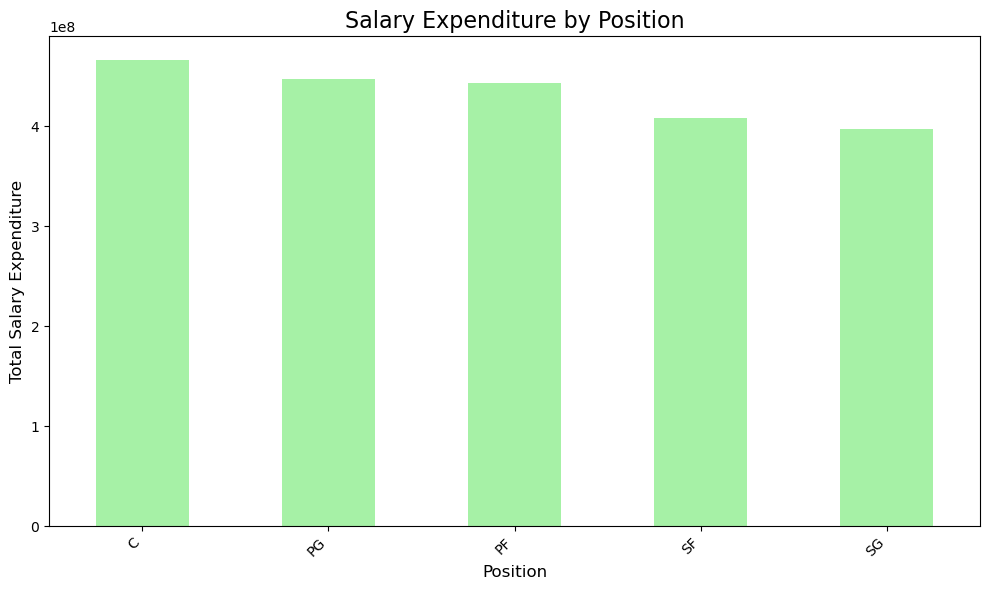

In [20]:


# Group by 'Team' and 'Position' to calculate salary expenditures
team_salary_expenditure = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary_expenditure = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Plot Salary Expenditure by Team
plt.figure(figsize=(10, 6))
team_salary_expenditure.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Salary Expenditure by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Salary Expenditure', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Salary Expenditure by Position
plt.figure(figsize=(10, 6))
position_salary_expenditure.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Salary Expenditure by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Total Salary Expenditure', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Investigate if there's any correlation between age and salary, and represent it visually. 


In [28]:
correlation = data['Age'].corr(data['Salary'])

In [30]:
print(f"The correlation between Age and Salary is: {correlation:.2f}")

The correlation between Age and Salary is: 0.21


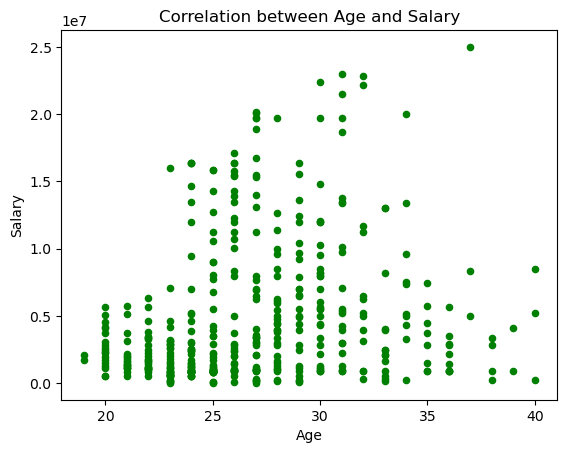

In [40]:
data.plot(kind='scatter', x='Age', y='Salary', title='Correlation between Age and Salary',color='g')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

